In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('data.csv')
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
data = data.drop('id',axis=1)

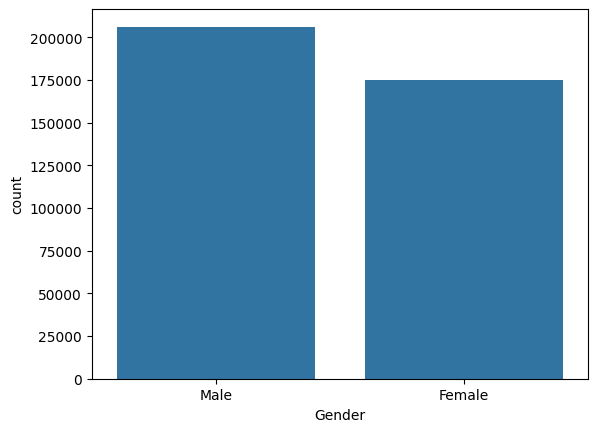

In [6]:
sns.countplot(data=data,x='Gender')
plt.show()

In [7]:
data.shape

(381109, 11)

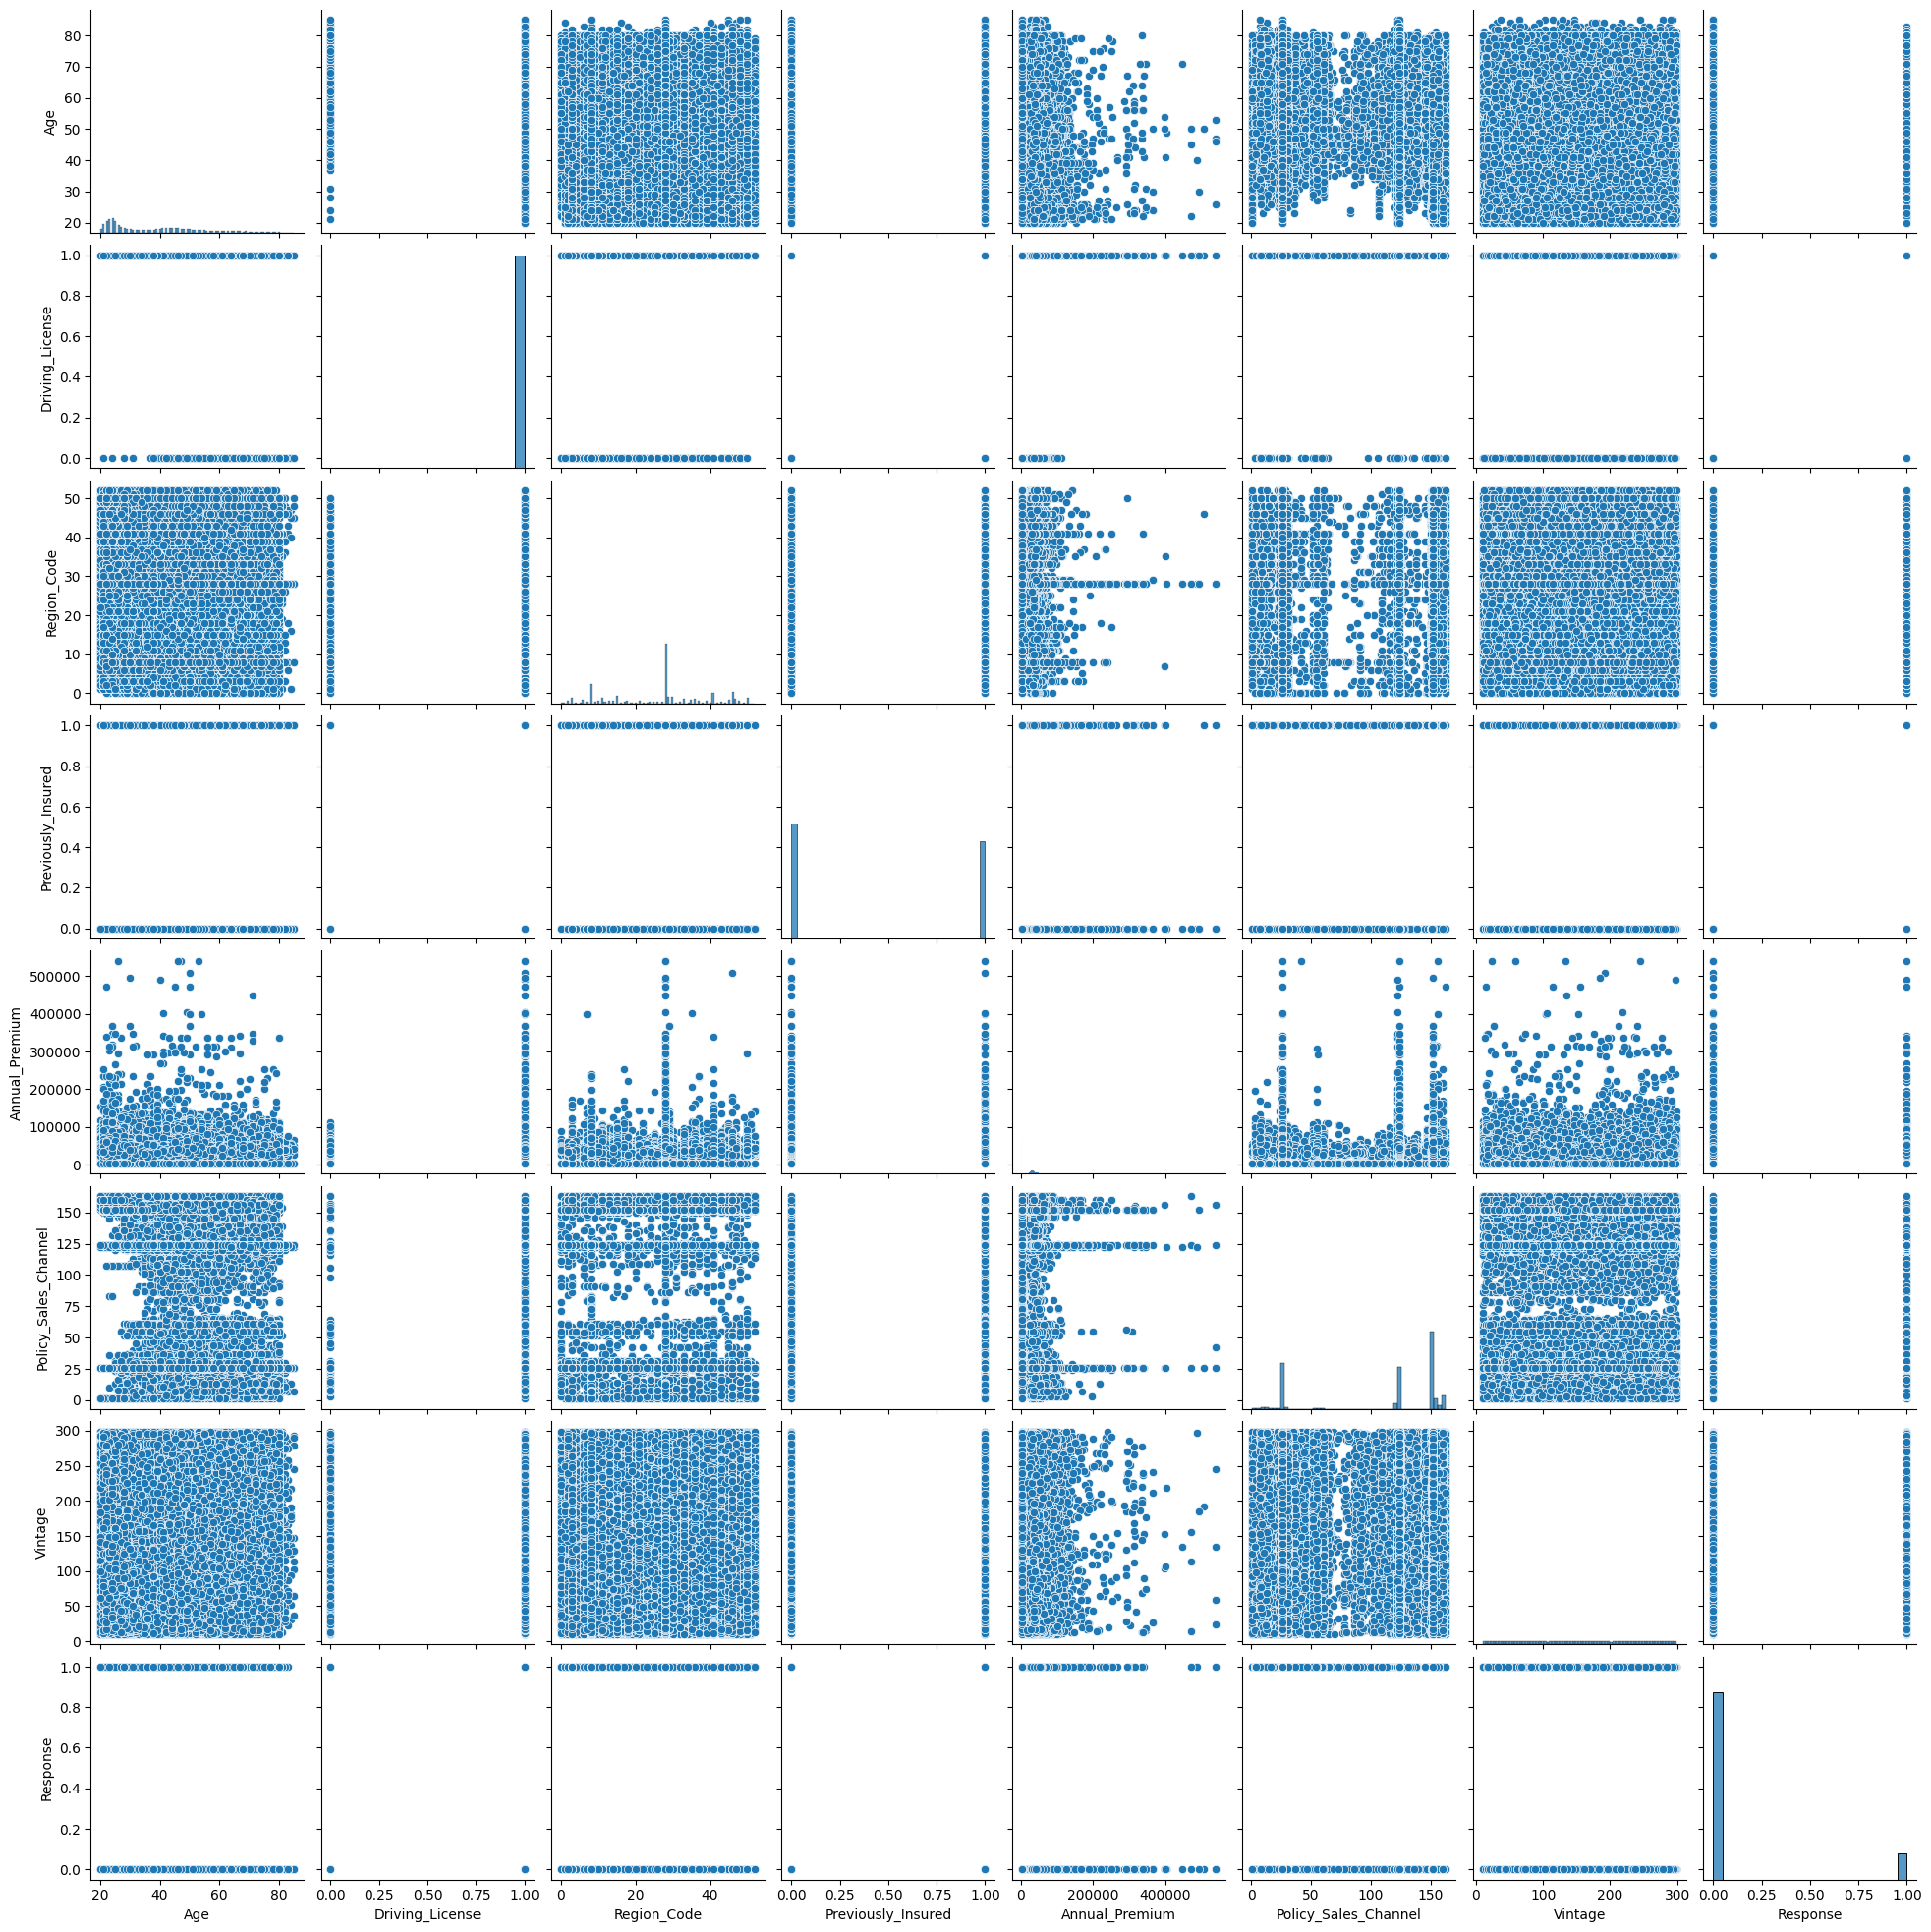

In [11]:
sns.pairplot(data)
plt.show()

In [12]:
data['Gender'] = data['Gender'].map({'Male':1,'Female':0})

In [14]:
data['Vehicle_Age'].value_counts()

Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64

In [15]:
data = pd.get_dummies(data,drop_first=True)


In [16]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,44,1,28.0,0,40454.0,26.0,217,1,False,True,True
1,1,76,1,3.0,0,33536.0,26.0,183,0,False,False,False
2,1,47,1,28.0,0,38294.0,26.0,27,1,False,True,True
3,1,21,1,11.0,1,28619.0,152.0,203,0,True,False,False
4,0,29,1,41.0,1,27496.0,152.0,39,0,True,False,False


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Gender                 381109 non-null  int64  
 1   Age                    381109 non-null  int64  
 2   Driving_License        381109 non-null  int64  
 3   Region_Code            381109 non-null  float64
 4   Previously_Insured     381109 non-null  int64  
 5   Annual_Premium         381109 non-null  float64
 6   Policy_Sales_Channel   381109 non-null  float64
 7   Vintage                381109 non-null  int64  
 8   Response               381109 non-null  int64  
 9   Vehicle_Age_< 1 Year   381109 non-null  bool   
 10  Vehicle_Age_> 2 Years  381109 non-null  bool   
 11  Vehicle_Damage_Yes     381109 non-null  bool   
dtypes: bool(3), float64(3), int64(6)
memory usage: 27.3 MB


In [18]:
data = data.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year",
               "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
data['Vehicle_Age_lt_1_Year'] = data['Vehicle_Age_lt_1_Year'].astype('int')
data['Vehicle_Age_gt_2_Years'] = data['Vehicle_Age_gt_2_Years'].astype('int')
data['Vehicle_Damage_Yes'] = data['Vehicle_Damage_Yes'].astype('int')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Gender                  381109 non-null  int64  
 1   Age                     381109 non-null  int64  
 2   Driving_License         381109 non-null  int64  
 3   Region_Code             381109 non-null  float64
 4   Previously_Insured      381109 non-null  int64  
 5   Annual_Premium          381109 non-null  float64
 6   Policy_Sales_Channel    381109 non-null  float64
 7   Vintage                 381109 non-null  int64  
 8   Response                381109 non-null  int64  
 9   Vehicle_Age_lt_1_Year   381109 non-null  int64  
 10  Vehicle_Age_gt_2_Years  381109 non-null  int64  
 11  Vehicle_Damage_Yes      381109 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 34.9 MB


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [21]:
X = data.drop('Response',axis=1)
y = data['Response']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [24]:
y_pred = rfc.predict(X_test)

In [25]:
accuracy_score(y_test,y_pred)

0.8646847366901944

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     66699
           1       0.37      0.12      0.18      9523

    accuracy                           0.86     76222
   macro avg       0.63      0.55      0.55     76222
weighted avg       0.82      0.86      0.83     76222

